In [45]:
import os; os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [46]:
from tqdm.auto import tqdm

from pathlib import Path
import numpy as np
import pandas as pd
import scipy
from pickle import dump, load
import matplotlib.pyplot as plt
import cv2
import random
from IPython.display import clear_output
import tensorflow as tf
# import plotly.express as px
from tensorflow.keras import layers
from PIL import Image
import re

import torch
import piq

# Lectura de datos: VGG16

In [47]:
with open('metricas_VGG.pkl', 'rb') as f:
    VGG = load(f)

In [48]:
VGG = pd.DataFrame(VGG).T.reset_index()

In [49]:
VGG[1].max()

0.8507612347602844

/tmp/uv0755/ipykernel_73650/2878166695.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks-10)
/tmp/uv0755/ipykernel_73650/2878166695.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks-10)


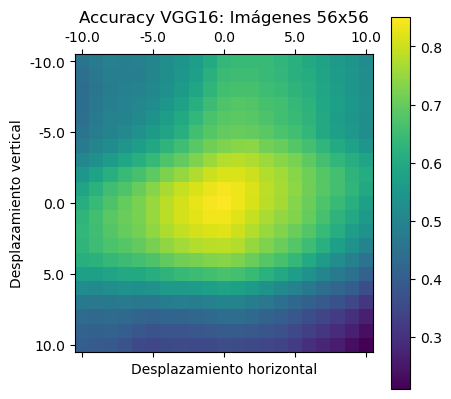

In [50]:
m = np.zeros(shape=(21,21))
for i, row in VGG.iterrows():
    i, j = int(row.level_0+10), int(row.level_1+10)
    m[i,j] = row[1]
plt.matshow(m)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels(ticks-10)
ax.set_yticklabels(ticks-10)
plt.title("Accuracy VGG16: Imágenes 56x56")
plt.xlabel("Desplazamiento horizontal")
plt.ylabel("Desplazamiento vertical")
plt.colorbar()
plt.show()

In [51]:
row[1]

0.21043670177459717

In [52]:
with open('metricas_VGG2.pkl', 'rb') as f:
    VGG2 = load(f)

In [53]:
VGG2 = pd.DataFrame(VGG2).T.reset_index()

/tmp/uv0755/ipykernel_73650/3449101144.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks-10)
/tmp/uv0755/ipykernel_73650/3449101144.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks-10)


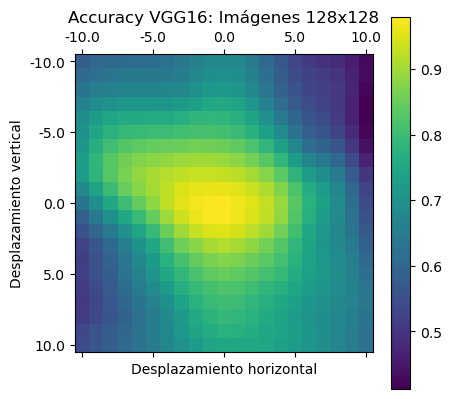

In [54]:
m = np.zeros(shape=(21,21))
for i, row in VGG2.iterrows():
    i, j = int(row.level_0+10), int(row.level_1+10)
    m[i,j] = row[1]
    # m[i,j] = row.LPIPS if not np.isnan(row.LPIPS) else 0
plt.matshow(m)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels(ticks-10)
ax.set_yticklabels(ticks-10)
plt.title("Accuracy VGG16: Imágenes 128x128")
plt.xlabel("Desplazamiento horizontal")
plt.ylabel("Desplazamiento vertical")
plt.colorbar()
plt.show()

In [55]:
with open('metricas_VGGGAP.pkl', 'rb') as f:
    VGGGAP = load(f)

In [56]:
VGGGAP = pd.DataFrame(VGGGAP).T.reset_index()

/tmp/uv0755/ipykernel_73650/171337295.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks-10)
/tmp/uv0755/ipykernel_73650/171337295.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks-10)


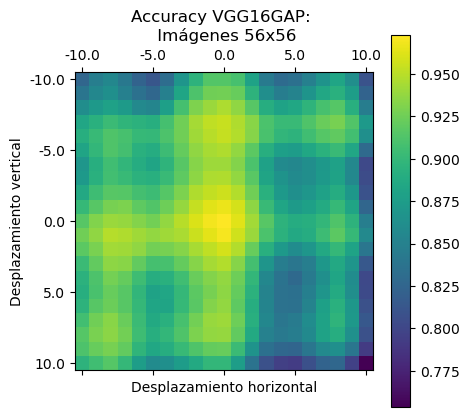

In [57]:
m = np.zeros(shape=(21,21))
for i, row in VGGGAP.iterrows():
    i, j = int(row.level_0+10), int(row.level_1+10)
    m[i,j] = row[1]
plt.matshow(m)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels(ticks-10)
ax.set_yticklabels(ticks-10)
plt.title("Accuracy VGG16GAP: \n Imágenes 56x56")
plt.xlabel("Desplazamiento horizontal")
plt.ylabel("Desplazamiento vertical")
plt.colorbar()
plt.show()

# Lectura de datos: ResNet50

In [58]:
with open('metricas_RN50.pkl', 'rb') as f:
    RN50 = load(f)

In [59]:
RN50 = pd.DataFrame(RN50).T.reset_index()

/tmp/uv0755/ipykernel_73650/4093078724.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks-10)
/tmp/uv0755/ipykernel_73650/4093078724.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks-10)


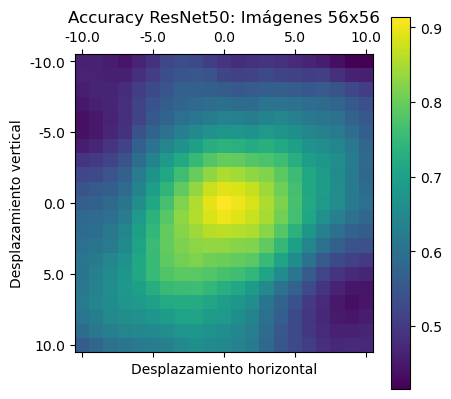

In [60]:
m = np.zeros(shape=(21,21))
for i, row in RN50.iterrows():
    i, j = int(row.level_0+10), int(row.level_1+10)
    m[i,j] = row[1]
    # m[i,j] = row.LPIPS if not np.isnan(row.LPIPS) else 0
plt.matshow(m)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels(ticks-10)
ax.set_yticklabels(ticks-10)
plt.title("Accuracy ResNet50: Imágenes 56x56")
plt.xlabel("Desplazamiento horizontal")
plt.ylabel("Desplazamiento vertical")
plt.colorbar()
plt.show()

In [61]:
with open('metricas_RN502.pkl', 'rb') as f:
    RN502 = load(f)

In [62]:
RN502 = pd.DataFrame(RN502).T.reset_index()

/tmp/uv0755/ipykernel_73650/1937236798.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks-10)
/tmp/uv0755/ipykernel_73650/1937236798.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks-10)


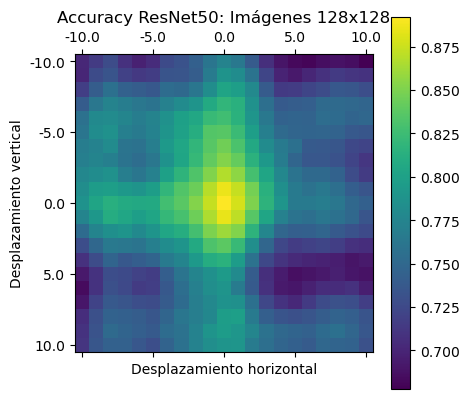

In [63]:
m = np.zeros(shape=(21,21))
for i, row in RN502.iterrows():
    i, j = int(row.level_0+10), int(row.level_1+10)
    m[i,j] = row[1]
    # m[i,j] = row.LPIPS if not np.isnan(row.LPIPS) else 0
plt.matshow(m)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels(ticks-10)
ax.set_yticklabels(ticks-10)
plt.title("Accuracy ResNet50: Imágenes 128x128")
plt.xlabel("Desplazamiento horizontal")
plt.ylabel("Desplazamiento vertical")
plt.colorbar()
plt.show()

In [64]:
with open('metricas_RNGAP.pkl', 'rb') as f:
    RNGAP = load(f)

In [65]:
RNGAP = pd.DataFrame(RNGAP).T.reset_index()

/tmp/uv0755/ipykernel_73650/1080751172.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks-10)
/tmp/uv0755/ipykernel_73650/1080751172.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks-10)


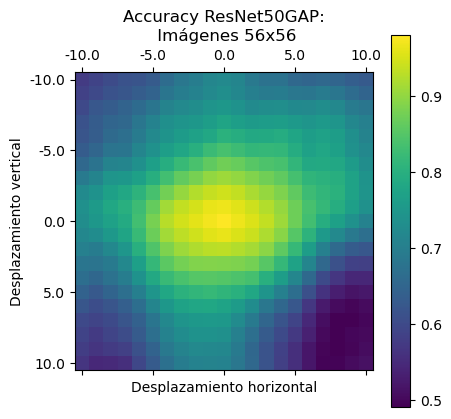

In [66]:
m = np.zeros(shape=(21,21))
for i, row in RNGAP.iterrows():
    i, j = int(row.level_0+10), int(row.level_1+10)
    m[i,j] = row[1]
    # m[i,j] = row.LPIPS if not np.isnan(row.LPIPS) else 0
plt.matshow(m)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels(ticks-10)
ax.set_yticklabels(ticks-10)
plt.title("Accuracy ResNet50GAP:\n Imágenes 56x56")
plt.xlabel("Desplazamiento horizontal")
plt.ylabel("Desplazamiento vertical")
plt.colorbar()
plt.show()

In [67]:
results = pd.read_csv("sweep_nuri.csv")

In [68]:
results.columns

Index(['desp_h', 'desp_v', 'accuracy_VGG', 'accuracy_RN50'], dtype='object')

In [69]:
results_VGG = results[["desp_h", "desp_v", "accuracy_VGG"]]

In [70]:
results_VGG.desp_h.unique()

array([ 40,   9,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  39,
        38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   8,   7,   6,   5,   4,   3,   2,   1,   0,  -1,
        -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12, -13, -14,
       -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27,
       -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40,
       -41, -42, -43, -44, -45, -46, -47, -48, -49, -50])

/tmp/uv0755/ipykernel_73650/3249503971.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks-50)
/tmp/uv0755/ipykernel_73650/3249503971.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks-50)


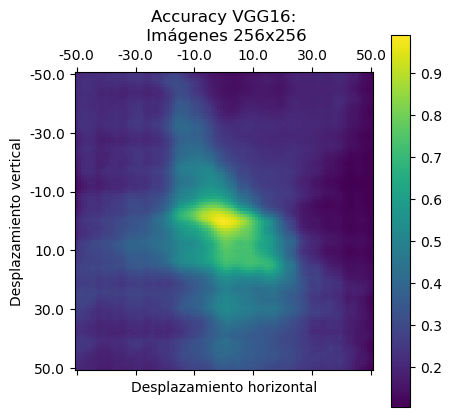

In [71]:
m = np.zeros(shape=(101,101))
for i, row in results_VGG.iterrows():
    i, j = int(row.desp_h+50), int(row.desp_v+50)
    m[i,j] = row.accuracy_VGG
plt.matshow(m)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels(ticks-50)
ax.set_yticklabels(ticks-50)
plt.title("Accuracy VGG16:\n Imágenes 256x256")
plt.xlabel("Desplazamiento horizontal")
plt.ylabel("Desplazamiento vertical")
plt.colorbar()
plt.show()

In [75]:
results_RN50 = results[["desp_h", "desp_v", "accuracy_RN50"]]

/tmp/uv0755/ipykernel_73650/2659229719.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks-50)
/tmp/uv0755/ipykernel_73650/2659229719.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks-50)


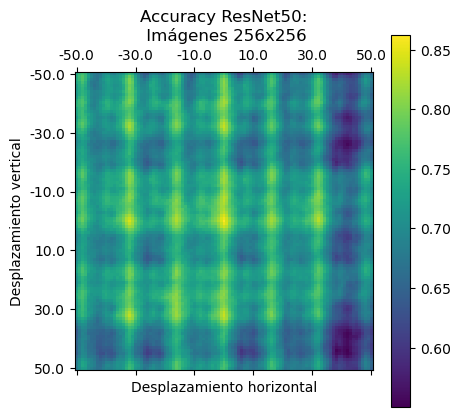

In [78]:
m = np.zeros(shape=(101,101))
for i, row in results_RN50.iterrows():
    i, j = int(row.desp_h+50), int(row.desp_v+50)
    m[i,j] = row.accuracy_RN50
plt.matshow(m)
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels(ticks-50)
ax.set_yticklabels(ticks-50)
plt.title("Accuracy ResNet50:\n Imágenes 256x256")
plt.xlabel("Desplazamiento horizontal")
plt.ylabel("Desplazamiento vertical")
plt.colorbar()
plt.show()